In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_excel('Time_Series_Data_23.xlsx')
df.head()

,DATE,Vol,Val
0,"June 1, 2020",476.97,10413.11
1,"June 2, 2020",476.78,9951.30
2,"June 3, 2020",456.26,9622.38
3,"June 4, 2020",463.05,9639.50
4,"June 5, 2020",464.79,9539.52


In [4]:
df_copy = df.copy()

In [5]:
df_copy.head()

,DATE,Vol,Val
0,"June 1, 2020",476.97,10413.11
1,"June 2, 2020",476.78,9951.30
2,"June 3, 2020",456.26,9622.38
3,"June 4, 2020",463.05,9639.50
4,"June 5, 2020",464.79,9539.52


### Forecasting with Linear Regression

In [6]:
df_copy.DATE = pd.to_datetime(df_copy.DATE,dayfirst=True)

In [7]:
df_copy.head()

,DATE,Vol,Val
0,2020-06-01,476.97,10413.11
1,2020-06-02,476.78,9951.30
2,2020-06-03,456.26,9622.38
3,2020-06-04,463.05,9639.50
4,2020-06-05,464.79,9539.52


In [8]:
data = {'date': df_copy['DATE'],
        'Volume': df_copy['Vol']}


df_copy_Vol = pd.DataFrame(data)

In [9]:
df_copy_Vol['Volume']=df_copy_Vol['Volume']/100
df_copy_Vol.head()

,date,Volume
0,2020-06-01,4.7697
1,2020-06-02,4.7678
2,2020-06-03,4.5626
3,2020-06-04,4.6305
4,2020-06-05,4.6479


In [10]:
df_copy_Vol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1076 entries, 0 to 1075
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1076 non-null   datetime64[ns]
 1   Volume  1076 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 16.9 KB


In [11]:
df_copy_Vol['time'] = np.arange(1,1077,1)

In [12]:
df_copy_Vol.head()

,date,Volume,time
0,2020-06-01,4.7697,1
1,2020-06-02,4.7678,2
2,2020-06-03,4.5626,3
3,2020-06-04,4.6305,4
4,2020-06-05,4.6479,5


In [13]:
df_copy_Vol['mont_name'] = df_copy_Vol['date'] .dt.month_name()

In [14]:
df_copy.head()

,DATE,Vol,Val
0,2020-06-01,476.97,10413.11
1,2020-06-02,476.78,9951.30
2,2020-06-03,456.26,9622.38
3,2020-06-04,463.05,9639.50
4,2020-06-05,464.79,9539.52


## Splitting the DATA into Train And Test data

In [15]:
## Splitting the Data into dependent and independent 
df_train = df_copy_Vol.head(860)
df_test = df_copy_Vol.loc[860:]

In [16]:
df_test.head()

,date,Volume,time,mont_name
860,2022-10-09,22.9061,861,October
861,2022-10-10,24.1002,862,October
862,2022-10-11,24.3491,863,October
863,2022-10-12,24.5081,864,October
864,2022-10-13,23.9986,865,October


In [17]:
df_train.tail()

,date,Volume,time,mont_name
855,2022-10-04,23.9690,856,October
856,2022-10-05,22.7201,857,October
857,2022-10-06,23.3147,858,October
858,2022-10-07,23.2971,859,October
859,2022-10-08,23.6574,860,October


In [18]:
x_train = df_train['time'].values
x_train.shape

(860,)

In [19]:
time_sq = x_train**2

In [20]:
time_sq.shape

(860,)

In [21]:
X_train = pd.DataFrame({'time' : x_train, 'time_sq' : time_sq})

In [22]:
X_train.head()

,time,time_sq
0,1,1
1,2,4
2,3,9
3,4,16
4,5,25


In [23]:
x_test = df_test['time'].values

In [24]:
X_test = pd.DataFrame({'time' : x_test, 'time_sq' :  x_test**2})
X_test.shape

(216, 2)

In [25]:
X_test.head()

,time,time_sq
0,861,741321
1,862,743044
2,863,744769
3,864,746496
4,865,748225


In [26]:
y_train = df_train['Volume'].values
y_train.shape

(860,)

In [27]:
y_test = df_test['Volume'].values
y_test.shape

(216,)

## Polynomial regression

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
model_trend = LinearRegression()
model_trend.fit(X_train,y_train)

LinearRegression()

In [30]:
y_fittedvalue = model_trend.predict(X_train)

In [31]:
y_forecastedvalue = model_trend.predict(X_test)

In [32]:
## Margin of error in our prediction 
### Confidence interval
## Margin of error

- $ CI = \mu +-ME $

- ME = z * SE
- z = 1.96 (for 95% CI)
- SE = standard deviation of the error

In [33]:
error = y_train - y_fittedvalue
se = error.std()
ME = 1.96*se

In [34]:
ME

1.723956310096811

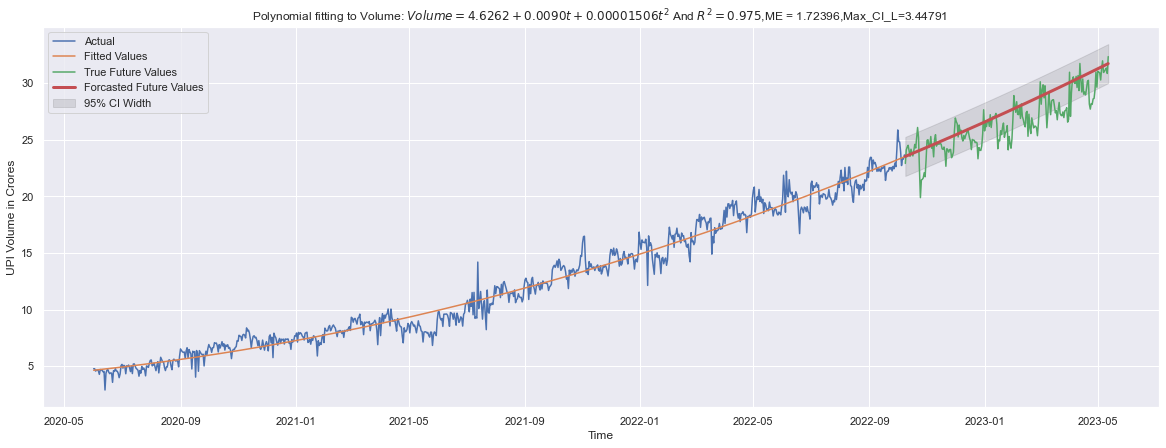

In [35]:
### Visulaize the fitted data
plt.figure(figsize=(20,7))
plt.plot(df_train['date'],y_train)
plt.plot(df_train['date'],y_fittedvalue)
## For forcasted data
plt.plot(df_test['date'],y_test)
plt.plot(df_test['date'],y_forecastedvalue,linewidth = 3)


## Margin of error
ci_plus = y_forecastedvalue + ME
ci_minus = y_forecastedvalue - ME

plt.fill_between(df_test['date'],(ci_plus),(ci_minus),alpha = 0.1,color = 'black')

plt.legend(['Actual','Fitted Values','True Future Values','Forcasted Future Values','95% CI Width'])
plt.title('Polynomial fitting to Volume: $ Volume = 4.6262 +0.0090t +0.00001506t^2$ And $ R^2 = 0.975$,ME = 1.72396,Max_CI_L=3.44791 ')
plt.ylabel('UPI Volume in Crores')
plt.xlabel('Time')
plt.show()

In [36]:
max_CI_len_pol = max(ci_plus-ci_minus)
max_CI_len_pol

3.447912620193623

## Additive modelling

- identifying the seasonal variation

In [37]:
df_train.head()

,date,Volume,time,mont_name
0,2020-06-01,4.7697,1,June
1,2020-06-02,4.7678,2,June
2,2020-06-03,4.5626,3,June
3,2020-06-04,4.6305,4,June
4,2020-06-05,4.6479,5,June


In [38]:
df_train.shape

(860, 4)

In [39]:
## Identifying the seasinality from the starting monnth 

In [40]:
df_train_s= df_train[:30]

In [41]:
df_train_s.shape

(30, 4)

In [42]:
df_train_s['day'] = df_train_s['date'] .dt.day_name()

C:\Users\Shiv Yadav\AppData\Local\Temp\ipykernel_17688\2608317907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_s['day'] = df_train_s['date'] .dt.day_name()


In [43]:
df_train_s.head()

,date,Volume,time,mont_name,day
0,2020-06-01,4.7697,1,June,Monday
1,2020-06-02,4.7678,2,June,Tuesday
2,2020-06-03,4.5626,3,June,Wednesday
3,2020-06-04,4.6305,4,June,Thursday
4,2020-06-05,4.6479,5,June,Friday


C:\Users\Shiv Yadav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


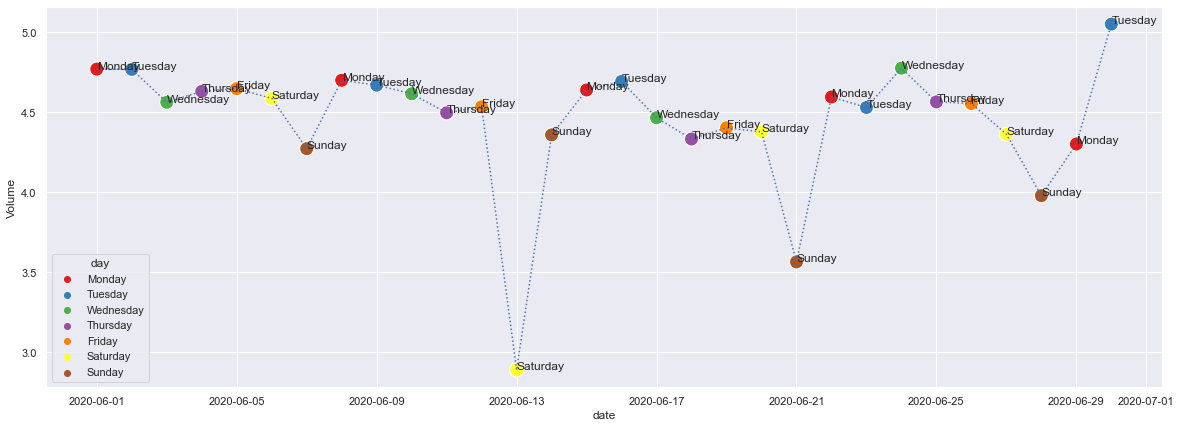

In [44]:
plt.figure(figsize=(20,7))
plt.scatter(df_train_s['date'],df_train_s['Volume'])
plt.plot(df_train_s['date'],df_train_s['Volume'],'b:')
sns.scatterplot('date','Volume',data = df_train_s,s=200,hue = 'day',palette ='Set1' )

for i in range(len(df_train_s)):
    plt.text(df_train_s['date'][i],df_train_s['Volume'][i],df_train_s['day'][i])
    

plt.show()

In [45]:
## Identifying the seasonality just after the covid months 


In [46]:
df_train_a_c= df_train[579:638]

In [47]:
df_train_a_c.shape

(59, 4)

In [48]:
df_train_a_c['day'] = df_train_a_c['date'] .dt.day_name()

C:\Users\Shiv Yadav\AppData\Local\Temp\ipykernel_17688\3387890553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_a_c['day'] = df_train_a_c['date'] .dt.day_name()


In [49]:
df_train_a_c.head()

,date,Volume,time,mont_name,day
579,2022-01-01,15.8527,580,January,Saturday
580,2022-01-02,15.3166,581,January,Sunday
581,2022-01-03,16.1487,582,January,Monday
582,2022-01-04,15.9501,583,January,Tuesday
583,2022-01-05,15.9171,584,January,Wednesday


C:\Users\Shiv Yadav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


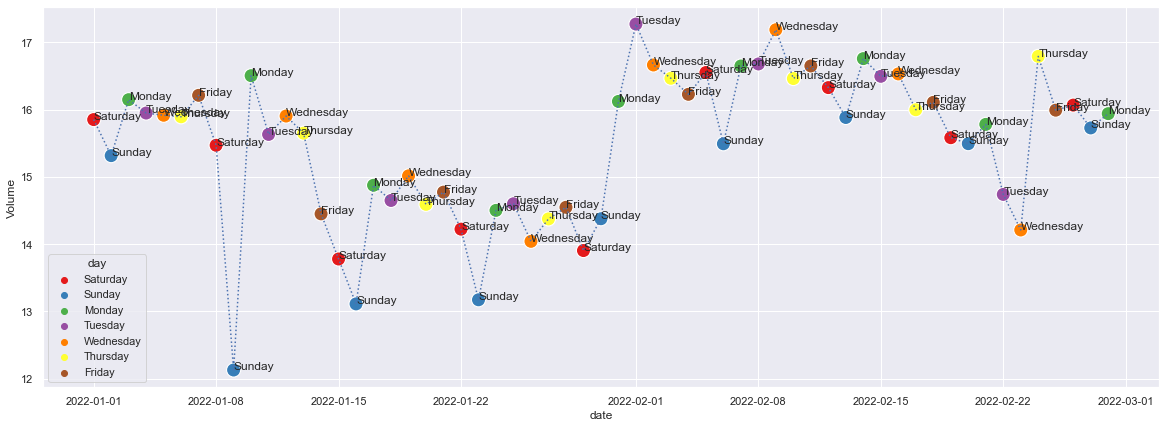

In [50]:
plt.figure(figsize=(20,7))
plt.scatter(df_train_a_c['date'],df_train_a_c['Volume'])
plt.plot(df_train_a_c['date'],df_train_a_c['Volume'],'b:')
sns.scatterplot('date','Volume',data = df_train_a_c,s=200,hue = 'day', palette ='Set1' )

for i in range(len(df_train_a_c)):
    plt.text(df_train_a_c['date'][i+579],df_train_a_c['Volume'][i+579],df_train_a_c['day'][i+579])
    

plt.show()

In [51]:
#### Taking the test as last 30 days of our train dataset 


In [52]:
df_train_a_c_f= df_train[829:861]
df_train_a_c_f.shape

(31, 4)

In [53]:
df_train_a_c_f['day'] = df_train_a_c_f['date'] .dt.day_name()

C:\Users\Shiv Yadav\AppData\Local\Temp\ipykernel_17688\4262396491.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_a_c_f['day'] = df_train_a_c_f['date'] .dt.day_name()


In [54]:
df_train_a_c_f.head()

,date,Volume,time,mont_name,day
829,2022-09-08,22.6981,830,September,Thursday
830,2022-09-09,22.2049,831,September,Friday
831,2022-09-10,22.4938,832,September,Saturday
832,2022-09-11,22.2264,833,September,Sunday
833,2022-09-12,22.4262,834,September,Monday


C:\Users\Shiv Yadav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


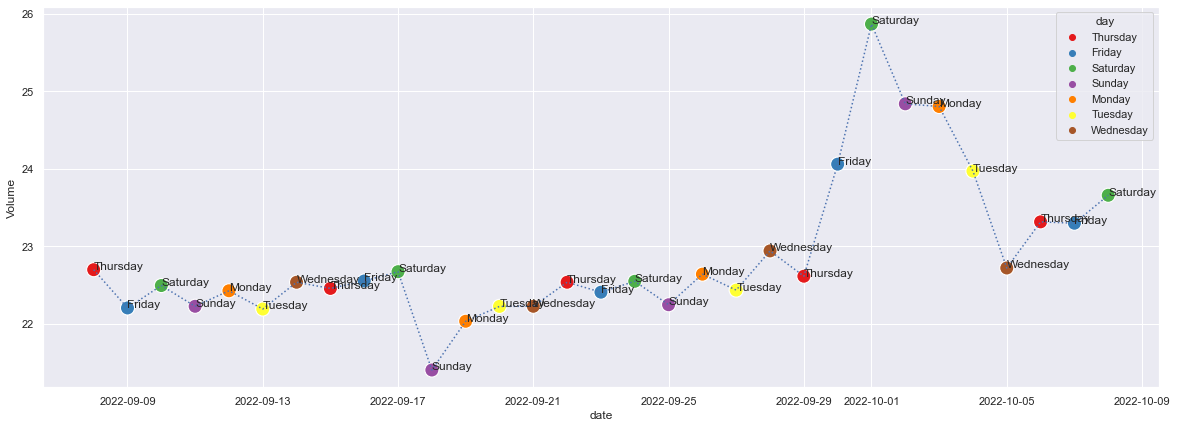

In [55]:
plt.figure(figsize=(20,7))
plt.scatter(df_train_a_c_f['date'],df_train_a_c_f['Volume'])
plt.plot(df_train_a_c_f['date'],df_train_a_c_f['Volume'],'b:')
sns.scatterplot('date','Volume',data = df_train_a_c_f,s=200,hue = 'day' , palette ='Set1')

for i in range(len(df_train_a_c_f)):
    plt.text(df_train_a_c_f['date'][i+829],df_train_a_c_f['Volume'][i+829],df_train_a_c_f['day'][i+829])
    

plt.show()

## From the above discussion it can be conclude that the period of seasonality is about 7 days

- since we have n= 7 , therfore we have to get n-1=6 dummy varaibles as follows

In [56]:
df_train['day'] = df_train['date'] .dt.day_name()

C:\Users\Shiv Yadav\AppData\Local\Temp\ipykernel_17688\3466623686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['day'] = df_train['date'] .dt.day_name()


In [57]:
df_train.head()

,date,Volume,time,mont_name,day
0,2020-06-01,4.7697,1,June,Monday
1,2020-06-02,4.7678,2,June,Tuesday
2,2020-06-03,4.5626,3,June,Wednesday
3,2020-06-04,4.6305,4,June,Thursday
4,2020-06-05,4.6479,5,June,Friday


In [58]:
dum = pd.get_dummies(df_train['day'],drop_first = True)
df_train1 = df_train.copy()
df_train1 = pd.concat((df_train1,dum),axis =1)

In [59]:
df_train1['time_sq'] = df_train1['time']**2

In [60]:
df_train1.head()

,date,Volume,time,mont_name,day,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,time_sq
0,2020-06-01,4.7697,1,June,Monday,1,0,0,0,0,0,1
1,2020-06-02,4.7678,2,June,Tuesday,0,0,0,0,1,0,4
2,2020-06-03,4.5626,3,June,Wednesday,0,0,0,0,0,1,9
3,2020-06-04,4.6305,4,June,Thursday,0,0,0,1,0,0,16
4,2020-06-05,4.6479,5,June,Friday,0,0,0,0,0,0,25


In [61]:
df_test['day'] = df_test['date'] .dt.day_name()

C:\Users\Shiv Yadav\AppData\Local\Temp\ipykernel_17688\2662528930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['day'] = df_test['date'] .dt.day_name()


In [62]:
dum = pd.get_dummies(df_test['day'],drop_first = True)
df_test1 = df_test.copy()
df_test1 = pd.concat((df_test1,dum),axis =1)

In [63]:
df_test1['time_sq'] = df_test1['time']**2

In [64]:
df_test1.head()

,date,Volume,time,mont_name,day,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,time_sq
860,2022-10-09,22.9061,861,October,Sunday,0,0,1,0,0,0,741321
861,2022-10-10,24.1002,862,October,Monday,1,0,0,0,0,0,743044
862,2022-10-11,24.3491,863,October,Tuesday,0,0,0,0,1,0,744769
863,2022-10-12,24.5081,864,October,Wednesday,0,0,0,0,0,1,746496
864,2022-10-13,23.9986,865,October,Thursday,0,0,0,1,0,0,748225


In [65]:
## Splitting in to dependent and independent varaibles
cols = ['time','Monday' ,'Saturday' ,'Sunday' ,'Thursday' ,'Tuesday' ,'Wednesday','time_sq']
x_train_add = df_train1[cols].values
x_test_add  = df_test1[cols].values
y_train_add = df_train1['Volume'].values 
y_test_add  = df_test1['Volume'].values

In [66]:
x_train_add.shape, x_test_add.shape, y_train_add.shape, y_test_add.shape

((860, 8), (216, 8), (860,), (216,))

## Multiple linear regression(Additive Model)

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
model_add = LinearRegression()
model_add.fit(x_train_add,y_train_add)

LinearRegression()

In [69]:
## Fitted Values 
y_fittedvalue_add = model_add.predict(x_train_add)

## Forecasted Values

y_forecast_add = model_add.predict(x_test_add)

In [70]:
from sklearn.metrics import mean_squared_error, r2_score

In [71]:
r2 = r2_score(y_train_add, y_fittedvalue_add)


In [72]:
r2

0.9769388560550435

In [73]:
print('Coefficients:', model_add.coef_)

Coefficients: [ 9.00501560e-03  1.98659118e-02 -4.55024174e-02 -6.46839544e-01
 -2.04886250e-02  5.14179081e-02  9.05471546e-02  1.50334172e-05]


In [74]:
print('Intercept:', model_add.intercept_)

Intercept: 4.700662219539071


In [75]:
## Margin of error
## ME = 1.96* SE
error_add = y_train_add - y_fittedvalue_add
SE_add = error_add.std()
ME_add = 1.96 * SE_add

In [76]:
SE_add

0.8475961121169763

In [77]:
ME_add

1.6612883797492735

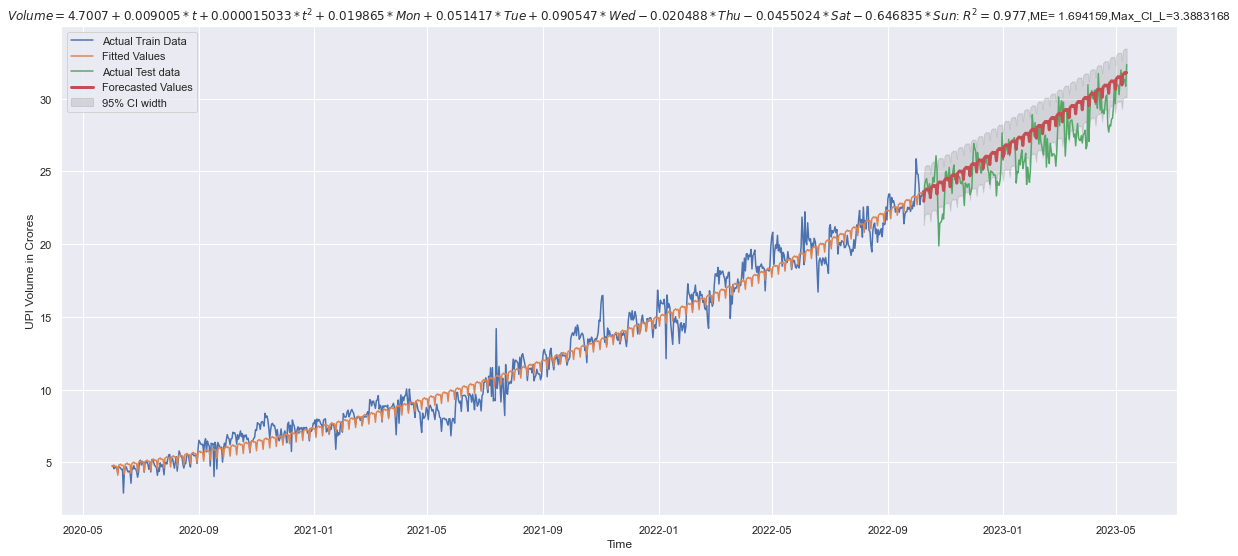

In [78]:
## Visulaise the data
plt.figure(figsize = (20,9))
plt.plot(df_train['date'],y_train_add)
plt.plot(df_train['date'],y_fittedvalue_add)
## forecasted data
plt.plot(df_test1['date'],y_test_add)
plt.plot(df_test1['date'],y_forecast_add,linewidth =3)
## margin of error
ci_plus_add = y_forecast_add + ME_add
ci_minus_add = y_forecast_add - ME_add
plt.fill_between(df_test1['date'],(ci_plus_add),(ci_minus_add),alpha = 0.1,color = 'black')
plt.ylabel('UPI Volume in Crores')
plt.xlabel('Time')
plt.legend(['Actual Train Data','Fitted Values','Actual Test data','Forecasted Values','95% CI width'])
plt.title('$Volume=4.7007+0.009005*t+0.000015033*t^2+0.019865*Mon+0.051417*Tue+0.090547*Wed-0.020488*Thu-0.0455024*Sat-0.646835*Sun$: $ R^2 = 0.977 $,ME= 1.694159,Max_CI_L=3.3883168 ')
plt.show()

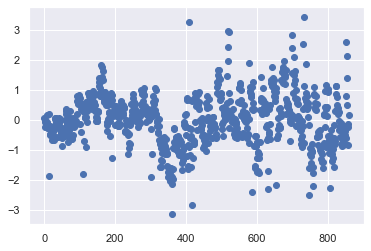

In [79]:
plt.scatter(df_train['time'],error_add)

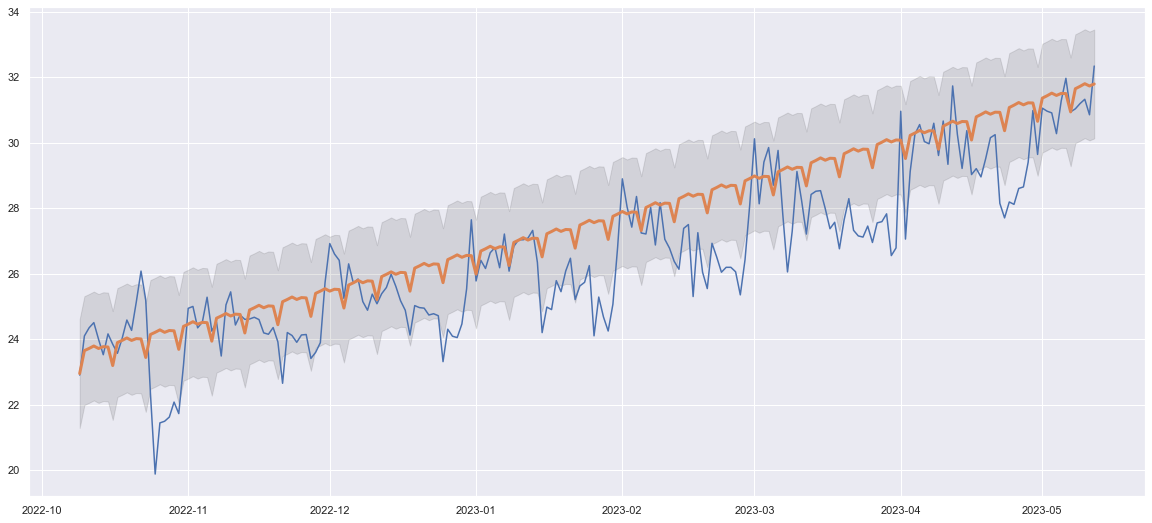

In [80]:
plt.figure(figsize = (20,9))
plt.plot(df_test1['date'],y_test_add)
plt.plot(df_test1['date'],y_forecast_add,linewidth =3)
## margin of error
ci_plus_add = y_forecast_add + ME_add
ci_minus_add = y_forecast_add - ME_add
plt.fill_between(df_test1['date'],(ci_plus_add),(ci_minus_add),alpha = 0.1,color = 'black')
plt.show()

In [81]:
max_CI_len_add = max(ci_plus_add-ci_minus_add)
max_CI_len_add

3.3225767594985456

## CONCLUSION: The fitted model is NOT as good as desired, hence the seasonality is not 7 for the Volume data

## Multiplicative modelling


In [82]:
df_train.tail()

,date,Volume,time,mont_name,day
855,2022-10-04,23.9690,856,October,Tuesday
856,2022-10-05,22.7201,857,October,Wednesday
857,2022-10-06,23.3147,858,October,Thursday
858,2022-10-07,23.2971,859,October,Friday
859,2022-10-08,23.6574,860,October,Saturday


In [83]:
df_test.head()

,date,Volume,time,mont_name,day
860,2022-10-09,22.9061,861,October,Sunday
861,2022-10-10,24.1002,862,October,Monday
862,2022-10-11,24.3491,863,October,Tuesday
863,2022-10-12,24.5081,864,October,Wednesday
864,2022-10-13,23.9986,865,October,Thursday


### Step 1: 

- Linear regression with time and Volume

In [84]:
df_train2 = df_train.copy()
df_train2.shape

(860, 5)

In [85]:
df_test2 = df_test.copy()

In [86]:
## Splitting into dependent and independent varaiables
X_train = df_train['time'].values
X_test = df_test['time'].values
X_train.shape,X_test.shape

((860,), (216,))

In [87]:
time_sq = X_train**2

In [88]:
X_train_mul = pd.DataFrame({'time' : X_train, 'time_sq' : time_sq})

In [89]:
X_train_mul.head()

,time,time_sq
0,1,1
1,2,4
2,3,9
3,4,16
4,5,25


In [90]:
time_sqt = X_test**2

In [91]:
X_test_mul = pd.DataFrame({'time' : X_test, 'time_sq' : time_sqt})
X_test_mul.shape

(216, 2)

In [92]:
## y train and y test
y_train_mul = df_train['Volume'].values
y_test_mul = df_test['Volume'].values
y_train_mul.shape,y_test_mul.shape

((860,), (216,))

In [93]:
from sklearn.linear_model import LinearRegression
model_trend_mul = LinearRegression()
model_trend_mul.fit(X_train_mul,y_train_mul)

LinearRegression()

### Step 2: Take the trend Value


In [94]:
y_fitted_trend = model_trend_mul.predict(X_train_mul)
y_fitted_trend.shape

(860,)

In [95]:
df_train2['predicted_T'] = y_fitted_trend
df_train2.tail()

,date,Volume,time,mont_name,day,predicted_T
855,2022-10-04,23.9690,856,October,Tuesday,23.349315
856,2022-10-05,22.7201,857,October,Wednesday,23.384094
857,2022-10-06,23.3147,858,October,Thursday,23.418904
858,2022-10-07,23.2971,859,October,Friday,23.453743
859,2022-10-08,23.6574,860,October,Saturday,23.488613


### Step 3: Calculate Seasonal DEviation (SI)

In [96]:
df_train2['SI'] = df_train2['Volume']/ df_train2['predicted_T']
df_train2.head()

,date,Volume,time,mont_name,day,predicted_T,SI
0,2020-06-01,4.7697,1,June,Monday,4.635194,1.029018
1,2020-06-02,4.7678,2,June,Tuesday,4.644221,1.026609
2,2020-06-03,4.5626,3,June,Wednesday,4.653278,0.980513
3,2020-06-04,4.6305,4,June,Thursday,4.662364,0.993166
4,2020-06-05,4.6479,5,June,Friday,4.671481,0.994952


###  Step 4: Average seasonal deviation

In [97]:
deviation_season = df_train2[['day','SI']].groupby(by='day').mean().rename(columns={'SI':'correction_factor'})
deviation_season

,correction_factor
day,
Friday,1.010978
Monday,1.011175
Saturday,0.999830
Sunday,0.942386
Thursday,1.003796
Tuesday,1.015081
Wednesday,1.017191


### Step 5 : Calculate the fitted values

In [98]:
df_train2 = df_train2.merge(deviation_season,on='day')


In [99]:
df_train2.head()

,date,Volume,time,mont_name,day,predicted_T,SI,correction_factor
0,2020-06-01,4.7697,1,June,Monday,4.635194,1.029018,1.011175
1,2020-06-08,4.6999,8,June,Monday,4.699013,1.000189,1.011175
2,2020-06-15,4.6391,15,June,Monday,4.764307,0.973720,1.011175
3,2020-06-22,4.5955,22,June,Monday,4.831078,0.951237,1.011175
4,2020-06-29,4.3017,29,June,Monday,4.899324,0.878019,1.011175


In [100]:
df_train2['fitted_values'] = df_train2['predicted_T']*df_train2['correction_factor']

In [101]:
df_train2.head(10)

,date,Volume,time,mont_name,day,predicted_T,SI,correction_factor,fitted_values
0,2020-06-01,4.7697,1,June,Monday,4.635194,1.029018,1.011175,4.686994
1,2020-06-08,4.6999,8,June,Monday,4.699013,1.000189,1.011175,4.751525
2,2020-06-15,4.6391,15,June,Monday,4.764307,0.973720,1.011175,4.817550
3,2020-06-22,4.5955,22,June,Monday,4.831078,0.951237,1.011175,4.885066
4,2020-06-29,4.3017,29,June,Monday,4.899324,0.878019,1.011175,4.954075
5,2020-07-06,5.0334,36,July,Monday,4.969046,1.012951,1.011175,5.024576
6,2020-07-13,5.1852,43,July,Monday,5.040244,1.028760,1.011175,5.096570
7,2020-07-20,4.6125,50,July,Monday,5.112918,0.902127,1.011175,5.170056
8,2020-07-27,5.0187,57,July,Monday,5.187068,0.967541,1.011175,5.245035
9,2020-08-03,5.0898,64,August,Monday,5.262694,0.967147,1.011175,5.321505


### Forecasting the future values

In [102]:
fit_trend = model_trend_mul.predict(X_test_mul)
df_test2['Forecasted_trend'] = fit_trend
df_test2.head()

,date,Volume,time,mont_name,day,Forecasted_trend
860,2022-10-09,22.9061,861,October,Sunday,23.523513
861,2022-10-10,24.1002,862,October,Monday,23.558443
862,2022-10-11,24.3491,863,October,Tuesday,23.593402
863,2022-10-12,24.5081,864,October,Wednesday,23.628393
864,2022-10-13,23.9986,865,October,Thursday,23.663413


In [103]:
df_test2 = pd.merge(df_test2,deviation_season,on='day')
df_test2.head()

,date,Volume,time,mont_name,day,Forecasted_trend,correction_factor
0,2022-10-09,22.9061,861,October,Sunday,23.523513,0.942386
1,2022-10-16,23.8485,868,October,Sunday,23.768654,0.942386
2,2022-10-23,25.2011,875,October,Sunday,24.015272,0.942386
3,2022-10-30,21.7295,882,October,Sunday,24.263365,0.942386
4,2022-11-06,24.2483,889,November,Sunday,24.512934,0.942386


In [104]:
df_test2['Forecasted_Vol_mul'] = df_test2['Forecasted_trend']*df_test2['correction_factor']

In [105]:
df_test2.head()

,date,Volume,time,mont_name,day,Forecasted_trend,correction_factor,Forecasted_Vol_mul
0,2022-10-09,22.9061,861,October,Sunday,23.523513,0.942386,22.168237
1,2022-10-16,23.8485,868,October,Sunday,23.768654,0.942386,22.399255
2,2022-10-23,25.2011,875,October,Sunday,24.015272,0.942386,22.631664
3,2022-10-30,21.7295,882,October,Sunday,24.263365,0.942386,22.865464
4,2022-11-06,24.2483,889,November,Sunday,24.512934,0.942386,23.100655


In [106]:
### MArgin of error
## ME = 1.96* SE
## SE =

error_mul = df_train2['Volume']-df_train2['fitted_values']
SE_mul = error.std()
ME_mul = 1.96* SE_mul
print(ME_mul)

1.723956310096811


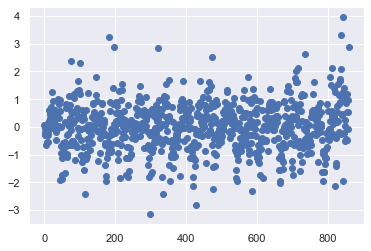

In [107]:
plt.scatter(df_train['time'],error_mul)

In [108]:
df_train2.sort_values(by='date',inplace = True)
df_test2.sort_values(by='date',inplace = True)

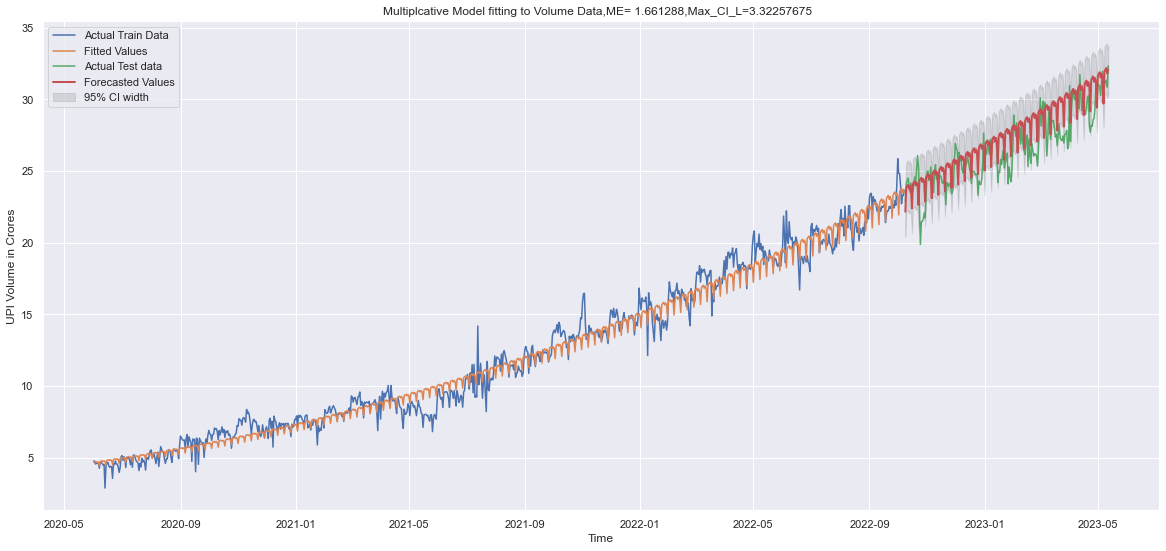

In [109]:
## Visulaise the data
plt.figure(figsize = (20,9))
plt.plot(df_train2['date'],y_train_mul)
plt.plot(df_train2['date'],df_train2['fitted_values'])
## forecasted data
plt.plot(df_test2['date'],y_test_mul)
plt.plot(df_test2['date'],df_test2['Forecasted_Vol_mul'],linewidth =2)
## margin of error
ci_plus_mul = df_test2['Forecasted_Vol_mul'] + ME_mul
ci_minus_mul = df_test2['Forecasted_Vol_mul']- ME_mul
plt.fill_between(df_test2['date'],(ci_plus_mul),(ci_minus_mul),alpha = 0.1,color = 'black')

plt.legend(['Actual Train Data','Fitted Values','Actual Test data','Forecasted Values','95% CI width'])
plt.ylabel('UPI Volume in Crores')
plt.xlabel('Time')
plt.title('Multiplcative Model fitting to Volume Data,ME= 1.661288,Max_CI_L=3.32257675  ')
plt.show()

In [110]:
max_CI_len_mul = max(ci_plus_mul-ci_minus_mul)
max_CI_len_mul

3.447912620193623

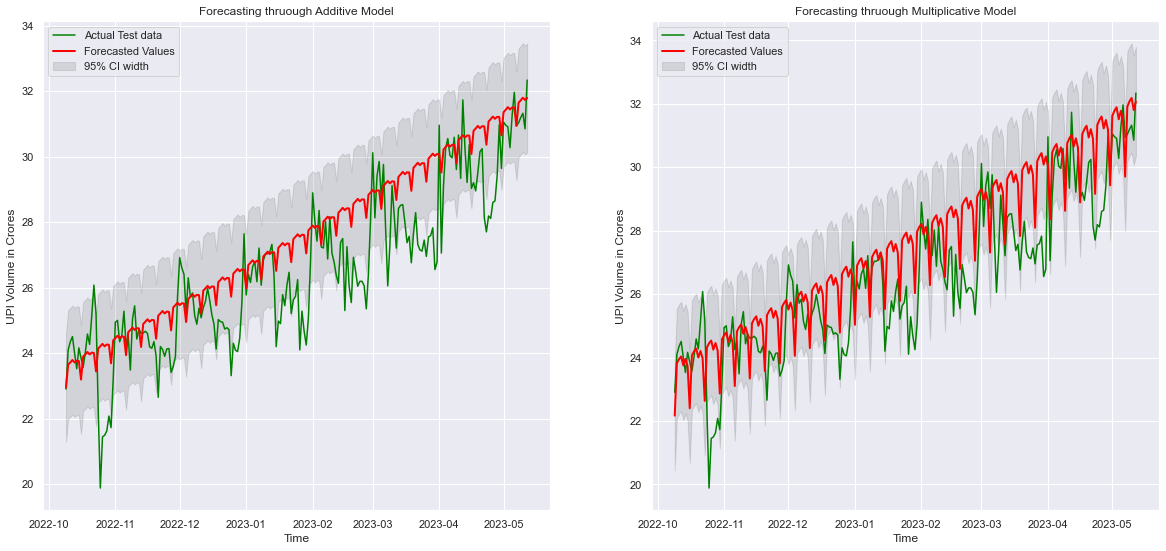

In [111]:
plt.figure(figsize = (20,9))

plt.subplot(1,2,1)
##
plt.plot(df_test1['date'],y_test_add,color='green')
plt.plot(df_test1['date'],y_forecast_add,linewidth =2,color='red')
## margin of error
ci_plus_add = y_forecast_add + ME_add
ci_minus_add = y_forecast_add - ME_add
plt.fill_between(df_test1['date'],(ci_plus_add),(ci_minus_add),alpha = 0.1,color = 'black')
plt.ylabel('UPI Volume in Crores')
plt.xlabel('Time')
plt.legend(['Actual Test data','Forecasted Values','95% CI width'],loc='upper left')
plt.title("Forecasting thruough Additive Model")

##
plt.subplot(1,2,2)
plt.plot(df_test2['date'],y_test_mul,color='green')
plt.plot(df_test2['date'],df_test2['Forecasted_Vol_mul'],linewidth =2,color='red')
## margin of error
ci_plus = df_test2['Forecasted_Vol_mul'] + ME_mul
ci_minus = df_test2['Forecasted_Vol_mul']- ME_mul
plt.fill_between(df_test2['date'],(ci_plus),(ci_minus),alpha = 0.1,color = 'black')
plt.ylabel('UPI Volume in Crores')
plt.xlabel('Time')
plt.legend(['Actual Test data','Forecasted Values','95% CI width'],loc='upper left')
plt.title("Forecasting thruough Multiplicative Model")
##

plt.show()

## Auto Regressive(AR) model

In [112]:
import statsmodels

In [113]:
statsmodels.__version__

'0.13.2'

In [114]:
df_copy.head()

,DATE,Vol,Val
0,2020-06-01,476.97,10413.11
1,2020-06-02,476.78,9951.30
2,2020-06-03,456.26,9622.38
3,2020-06-04,463.05,9639.50
4,2020-06-05,464.79,9539.52


In [115]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1076 entries, 0 to 1075
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    1076 non-null   datetime64[ns]
 1   Vol     1076 non-null   float64       
 2   Val     1076 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 25.3 KB


In [116]:
df_copy['Vol']=df_copy['Vol']/100

In [117]:
df_train = df_copy.head(860)
df_test = df_copy.loc[860:]

In [118]:
df_train.tail()

,DATE,Vol,Val
855,2022-10-04,23.9690,42082.91
856,2022-10-05,22.7201,34258.45
857,2022-10-06,23.3147,41501.46
858,2022-10-07,23.2971,41204.09
859,2022-10-08,23.6574,39710.25


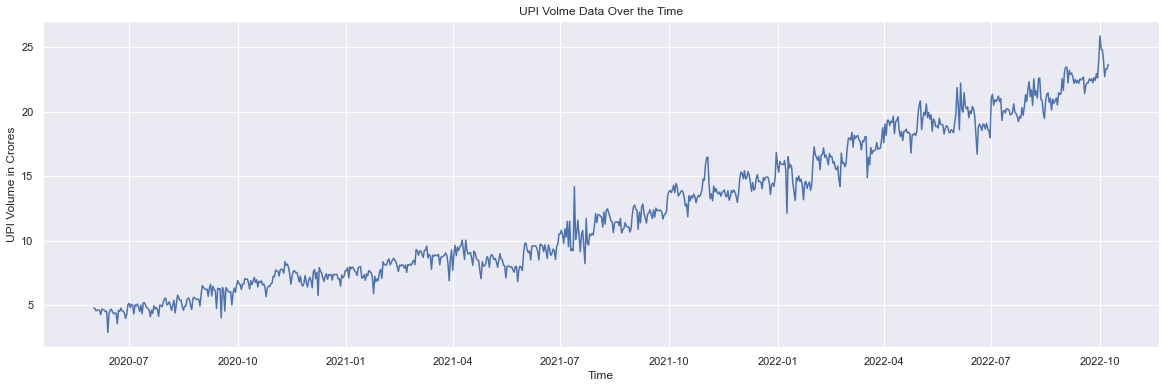

In [119]:
plt.figure(figsize=(20,6))
plt.plot(df_train['DATE'],df_train['Vol'])
plt.title('UPI Volme Data Over the Time')
plt.ylabel('UPI Volume in Crores')
plt.xlabel('Time')
plt.show()

In [120]:
## Splliting the dataset in to traing and testing dataset

In [121]:
df_train = df_copy.head(860)
df_test = df_copy.loc[860:]

In [122]:
df_train.tail()

,DATE,Vol,Val
855,2022-10-04,23.9690,42082.91
856,2022-10-05,22.7201,34258.45
857,2022-10-06,23.3147,41501.46
858,2022-10-07,23.2971,41204.09
859,2022-10-08,23.6574,39710.25


In [123]:
del df_train['Val']
del df_test['Val']

In [124]:
df_train.tail()

,DATE,Vol
855,2022-10-04,23.9690
856,2022-10-05,22.7201
857,2022-10-06,23.3147
858,2022-10-07,23.2971
859,2022-10-08,23.6574


In [125]:
df_test.head()

,DATE,Vol
860,2022-10-09,22.9061
861,2022-10-10,24.1002
862,2022-10-11,24.3491
863,2022-10-12,24.5081
864,2022-10-13,23.9986


### ACF and PACF

In [126]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

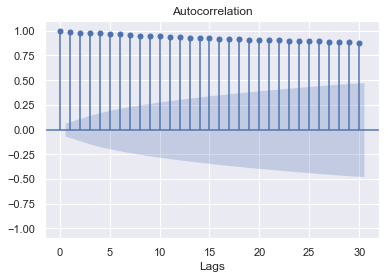

In [127]:
res1 = plot_acf(df_train['Vol'])
plt.ylim(-1.1, 1.1)
plt.xlabel('Lags')
plt.show()

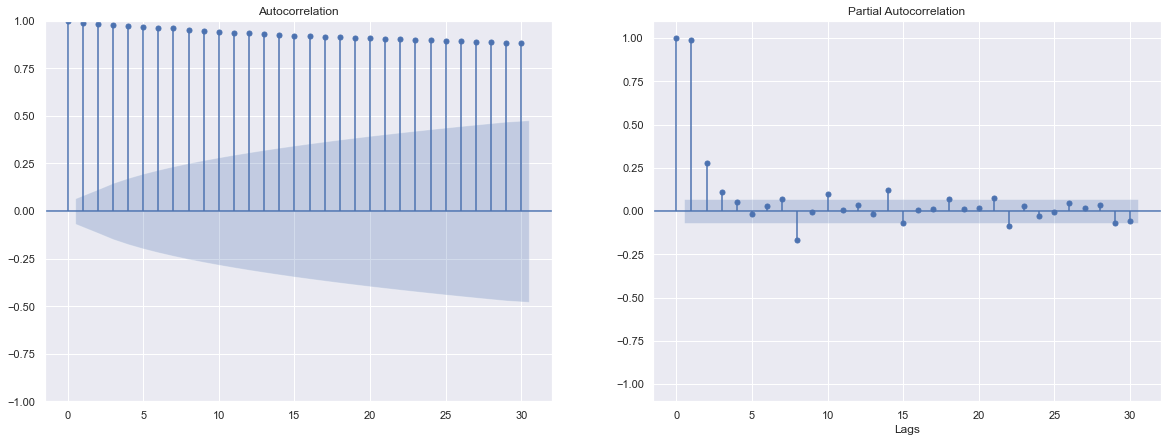

In [128]:
fig,ax = plt.subplots(nrows=1, ncols = 2, figsize=(20,7))
res1 = plot_acf(df_train['Vol'],ax=ax[0])
plt.ylim(-1.1, 1.5)
plt.xlabel('Lags')
res2 = plot_pacf(df_train['Vol'],ax=ax[1],method = 'ywm')
plt.ylim(-1.1, 1.1)
plt.xlabel('Lags')
plt.show()

In [129]:
##Checking for Stationarity

In [130]:
import statsmodels.tsa.stattools as sts
sts.adfuller(df_train['Vol'])

(1.0673223029676195,
 0.9949278521493282,
 20,
 839,
 {'1%': -3.438168140637663,
  '5%': -2.864991017121922,
  '10%': -2.5686076019468094},
 1598.2531754672136)

### Making the data stationary

In [131]:
differences = df_train['Vol'].diff()

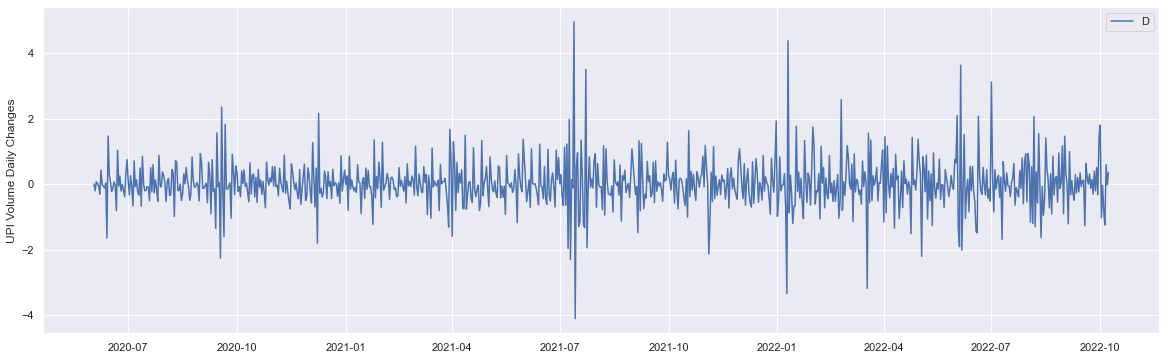

In [132]:
plt.figure(figsize=(20,6))
plt.plot(df_train['DATE'],differences)
plt.legend('Differences')
plt.ylabel('UPI Volume Daily Changes')
plt.show()

In [133]:
differences.dropna(inplace=True)## Dropping the NA values 

In [134]:
## AD-Fuller test for Difference data
import statsmodels.tsa.stattools as sts
sts.adfuller(differences)

(-11.890522971376775,
 5.883463195393567e-22,
 21,
 837,
 {'1%': -3.4381868797392277,
  '5%': -2.864999278011895,
  '10%': -2.568612002429454},
 1589.9763384065861)

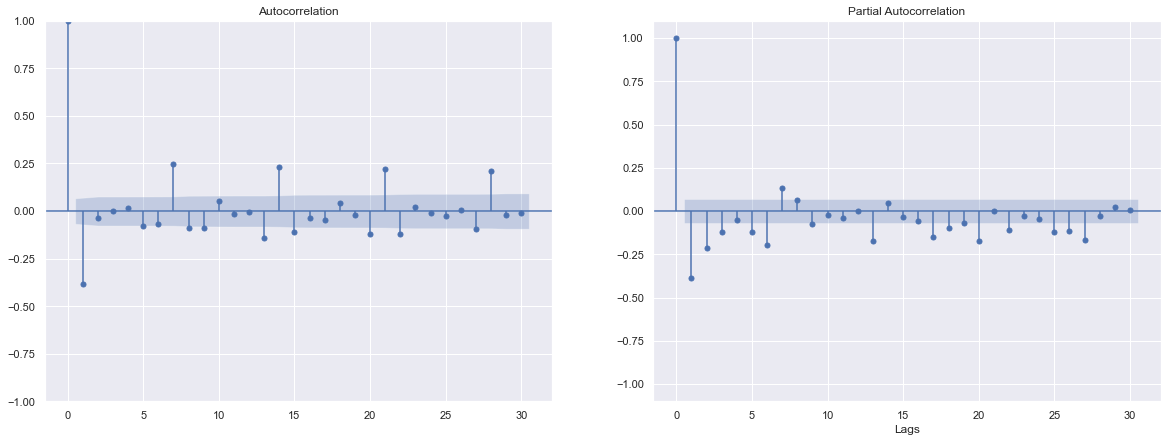

In [135]:
fig,ax = plt.subplots(nrows=1, ncols = 2, figsize=(20,7))
res1 = plot_acf(differences,ax=ax[0])
plt.ylim(-1.1, 1.5)
plt.xlabel('Lags')
res2 = plot_pacf(differences,ax=ax[1],method = 'ywm')
plt.ylim(-1.1, 1.1)
plt.xlabel('Lags')
plt.show()

In [136]:
## Second order differencing 


In [137]:
differences2 = df_train['Vol'].diff().diff()

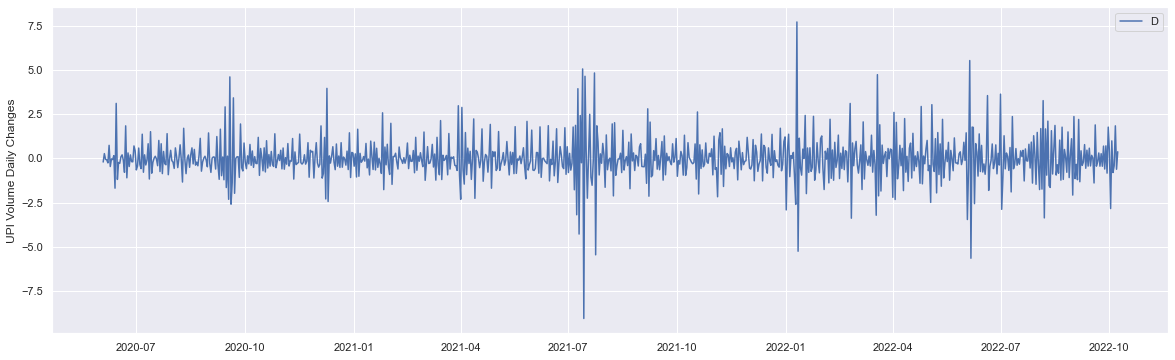

In [138]:
plt.figure(figsize=(20,6))
plt.plot(df_train['DATE'],differences2)
plt.legend('Differences')
plt.ylabel('UPI Volume Daily Changes')
plt.show()


In [139]:
differences2.dropna(inplace=True)## Dropping the NA values 

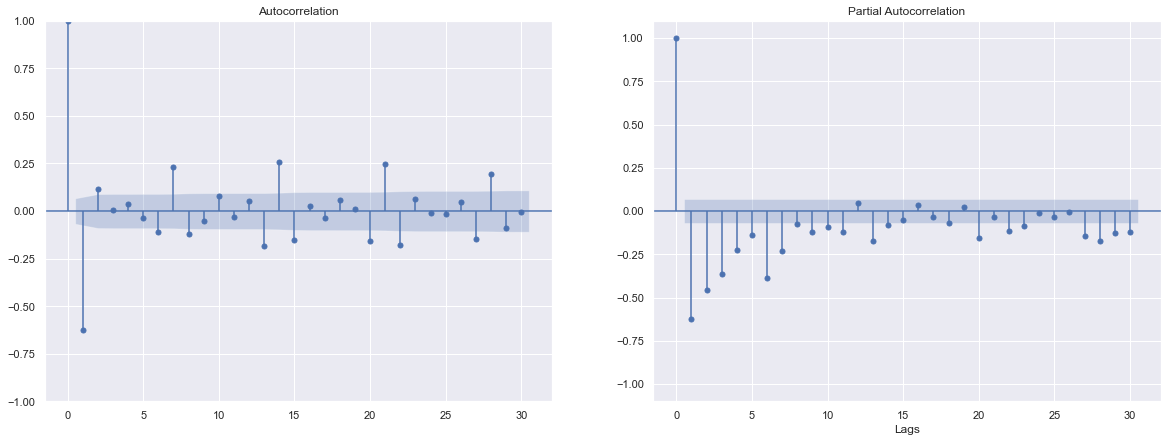

In [140]:
fig,ax = plt.subplots(nrows=1, ncols = 2, figsize=(20,7))
res1 = plot_acf(differences2,ax=ax[0])
plt.ylim(-1.1, 1.5)
plt.xlabel('Lags')
res2 = plot_pacf(differences2,ax=ax[1],method = 'ywm')
plt.ylim(-1.1, 1.1)
plt.xlabel('Lags')
plt.show()

In [141]:
## 3rd order differencing

In [142]:
differences3 = df_train['Vol'].diff().diff().diff()

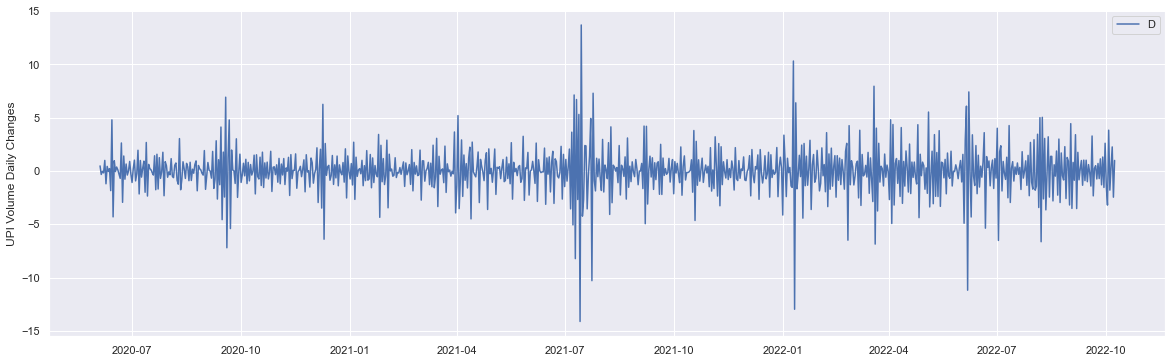

In [143]:
plt.figure(figsize=(20,6))
plt.plot(df_train['DATE'],differences3)
plt.legend('Differences')
plt.ylabel('UPI Volume Daily Changes')
plt.show()

In [144]:
differences3.dropna(inplace=True)## Dropping the NA values 

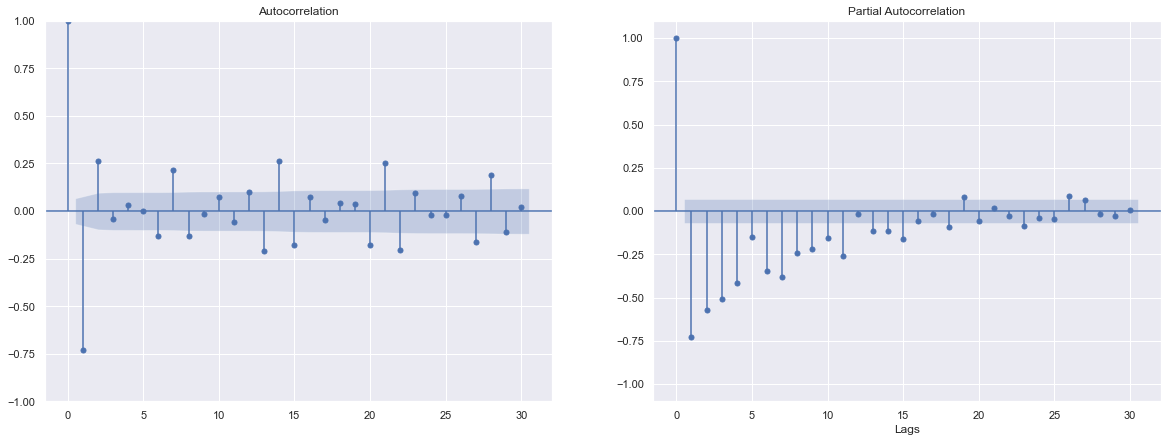

In [145]:
fig,ax = plt.subplots(nrows=1, ncols = 2, figsize=(20,7))
res1 = plot_acf(differences3,ax=ax[0])
plt.ylim(-1.1, 1.5)
plt.xlabel('Lags')
res2 = plot_pacf(differences3,ax=ax[1],method = 'ywm')
plt.ylim(-1.1, 1.1)
plt.xlabel('Lags')
plt.show()

In [146]:
#### AR modelling

### Auto Regressive Model of order p

- AR(p)

- p= number of lags

- find p using the PACF ( find the number of lags which are Not zero)

- 7 lags from the PACF

In [147]:
x_train = df_train.set_index('DATE')
x_test = df_test.set_index('DATE')

In [148]:
x_train = x_train.asfreq('d')

In [149]:
x_train.tail()

,Vol
DATE,
2022-10-04,23.9690
2022-10-05,22.7201
2022-10-06,23.3147
2022-10-07,23.2971
2022-10-08,23.6574


In [150]:
from statsmodels.tsa.ar_model import AutoReg

In [151]:
model_ar7 = AutoReg(x_train,lags=7).fit()

In [152]:
print(model_ar7.summary())

                            AutoReg Model Results                             
Dep. Variable:                    Vol   No. Observations:                  860
Model:                     AutoReg(7)   Log Likelihood                -849.947
Method:               Conditional MLE   S.D. of innovations              0.655
Date:                Fri, 16 Jun 2023   AIC                           1717.894
Time:                        16:17:05   BIC                           1760.633
Sample:                    06-08-2020   HQIC                          1734.263
                         - 10-08-2022                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0473      0.055      0.868      0.385      -0.060       0.154
Vol.L1         0.4700      0.034     14.004      0.000       0.404       0.536
Vol.L2         0.2040      0.037      5.482      0.0

In [153]:
## Fitted values
fittedvalues = model_ar7.fittedvalues

In [154]:
fittedvalues.tail()

DATE
2022-10-04    24.550566
2022-10-05    24.151177
2022-10-06    23.226734
2022-10-07    23.538063
2022-10-08    23.816586
Freq: D, dtype: float64

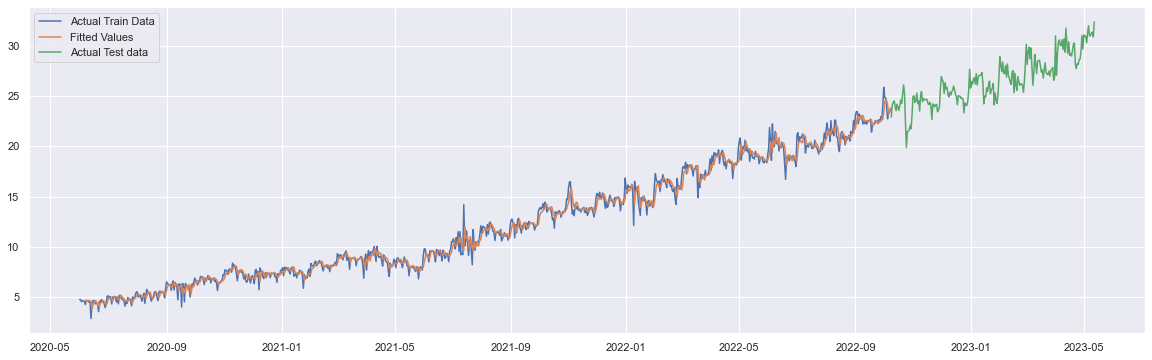

In [155]:
plt.figure(figsize=(20,6))
plt.plot(df_train['DATE'],df_train['Vol'])
## fitted values
plt.plot(fittedvalues)
plt.plot(df_test['DATE'],df_test['Vol'])
##
plt.legend(['Actual Train Data','Fitted Values','Actual Test data'])
plt.show()

In [156]:
import datetime

In [157]:
start_d = datetime.datetime.strptime('2022-10-09','%Y-%m-%d')
end_d = datetime.datetime.strptime('2023-5-12','%Y-%m-%d')

In [158]:
forecasted_values7 = model_ar7.predict(start = start_d,end = end_d )

In [159]:
forecasted_values7.head(60)

2022-10-09    23.821967
2022-10-10    24.031093
2022-10-11    23.978276
2022-10-12    23.796740
2022-10-13    23.831202
2022-10-14    23.811475
2022-10-15    23.853029
2022-10-16    23.903790
2022-10-17    23.984464
2022-10-18    24.019951
2022-10-19    24.026070
2022-10-20    24.051536
2022-10-21    24.066902
2022-10-22    24.087238
2022-10-23    24.113190
2022-10-24    24.148894
2022-10-25    24.179831
2022-10-26    24.206431
2022-10-27    24.234691
2022-10-28    24.260635
2022-10-29    24.285806
2022-10-30    24.311682
2022-10-31    24.339593
2022-11-01    24.367290
2022-11-02    24.394627
2022-11-03    24.422312
2022-11-04    24.449648
2022-11-05    24.476610
2022-11-06    24.503542
2022-11-07    24.530779
2022-11-08    24.558029
2022-11-09    24.585282
2022-11-10    24.612647
2022-11-11    24.640005
2022-11-12    24.667294
2022-11-13    24.694561
2022-11-14    24.721869
2022-11-15    24.749183
2022-11-16    24.776504
2022-11-17    24.803860
2022-11-18    24.831233
2022-11-19    24

In [160]:
forecasted_values7.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 216 entries, 2022-10-09 to 2023-05-12
Freq: D
Series name: None
Non-Null Count  Dtype  
--------------  -----  
216 non-null    float64
dtypes: float64(1)
memory usage: 3.4 KB


In [161]:
forecasted_df = pd.DataFrame(forecasted_values7)

In [162]:

forecasted_df.head()

,0
2022-10-09,23.821967
2022-10-10,24.031093
2022-10-11,23.978276
2022-10-12,23.796740
2022-10-13,23.831202


In [163]:
## Model Evaluation

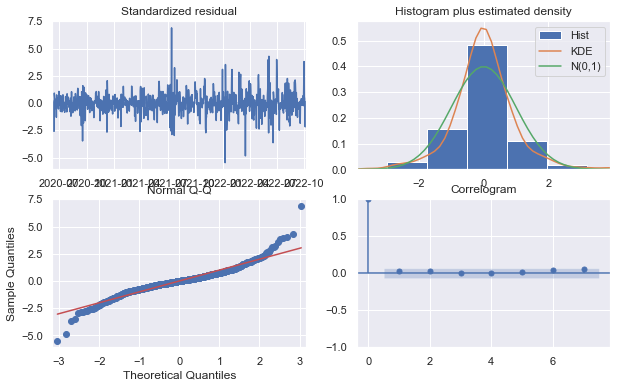

In [164]:
fig = plt.figure(figsize=(10,6))
fig = model_ar7.plot_diagnostics(lags = 7,fig =fig)

In [165]:
err_mean =  model_ar7.resid.mean()

In [166]:
err_mean

3.9760821963269617e-14

In [167]:
err_std = model_ar7.resid.std()

In [168]:
err_std

0.6557793605025325

In [169]:
## Generating the normal random errors for forecasting
np.random.seed(42)
size = len(forecasted_values7)
random_errors = np.random.normal(err_mean, err_std, size)


In [170]:
## Adding to the forcasted values 
forecasted_df['rand_err'] = random_errors

In [171]:
forecasted_df['trend'] = forecasted_values7

In [172]:
forecasted_df.head()

,0,rand_err,trend
2022-10-09,23.821967,0.325735,23.821967
2022-10-10,24.031093,-0.090671,24.031093
2022-10-11,23.978276,0.424741,23.978276
2022-10-12,23.796740,0.998772,23.796740
2022-10-13,23.831202,-0.153553,23.831202


In [173]:
forecasted_df['final_forecasted_values'] = forecasted_df['trend']+forecasted_df['rand_err']

In [174]:
forecasted_df.head()

,0,rand_err,trend,final_forecasted_values
2022-10-09,23.821967,0.325735,23.821967,24.147702
2022-10-10,24.031093,-0.090671,24.031093,23.940422
2022-10-11,23.978276,0.424741,23.978276,24.403016
2022-10-12,23.796740,0.998772,23.796740,24.795512
2022-10-13,23.831202,-0.153553,23.831202,23.677649


In [175]:
ME = 1.96 * model_ar7.resid.std()
ME

1.2853275465849636

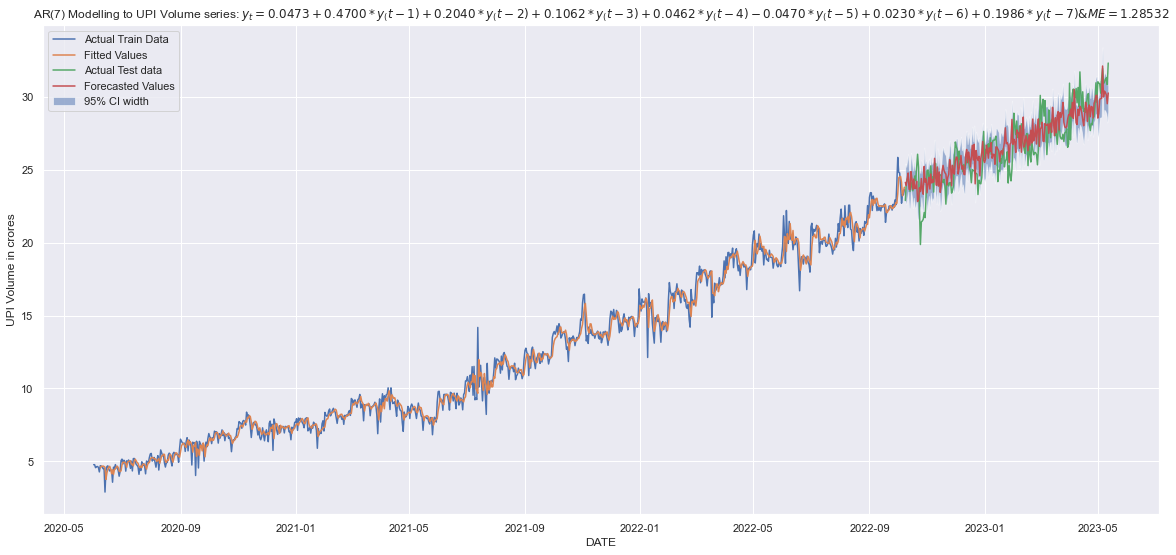

In [176]:
plt.figure(figsize=(20,9))
plt.plot(df_train['DATE'],df_train['Vol'])
## fitted values
plt.plot(fittedvalues)
#
plt.plot(df_test['DATE'],df_test['Vol'])
##Forecasted Values
plt.plot(df_test['DATE'],forecasted_df['final_forecasted_values'])

## 95% CI
plt.fill_between(df_test['DATE'],(forecasted_df['final_forecasted_values']+ME),(forecasted_df['final_forecasted_values']-ME),alpha=0.5)
plt.legend(['Actual Train Data','Fitted Values','Actual Test data','Forecasted Values', '95% CI width'])

##
plt.xlabel('DATE')
plt.ylabel('UPI Volume in crores')
##
plt.title('AR(7) Modelling to UPI Volume series: $y_t=0.0473+0.4700*y_(t-1) + 0.2040*y_(t-2) + 0.1062*y_(t-3) + 0.0462*y_(t-4) -0.0470*y_(t-5) + 0.0230*y_(t-6) + 0.1986*y_(t-7)& ME=1.28532$')
plt.show()

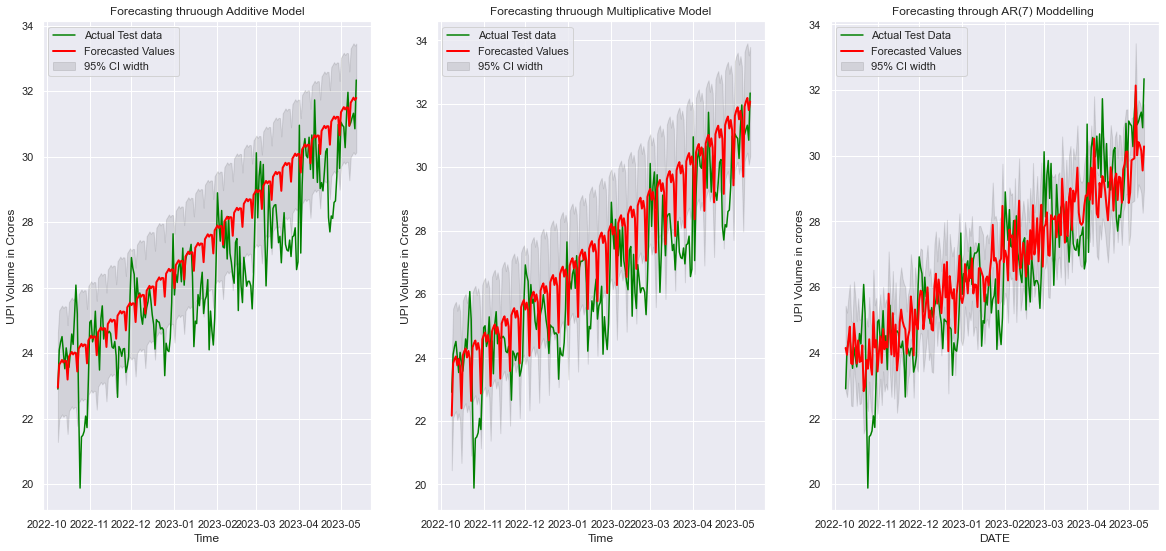

In [177]:
plt.figure(figsize = (20,9))

plt.subplot(1,3,1)
##
plt.plot(df_test1['date'],y_test_add,color='green')
plt.plot(df_test1['date'],y_forecast_add,linewidth =2,color='red')
## margin of error
ci_plus_add = y_forecast_add + ME_add
ci_minus_add = y_forecast_add - ME_add
plt.fill_between(df_test1['date'],(ci_plus_add),(ci_minus_add),alpha = 0.1,color = 'black')
plt.ylabel('UPI Volume in Crores')
plt.xlabel('Time')
plt.legend(['Actual Test data','Forecasted Values','95% CI width'],loc='upper left')
plt.title("Forecasting thruough Additive Model")

##
plt.subplot(1,3,2)
plt.plot(df_test2['date'],y_test_mul,color='green')
plt.plot(df_test2['date'],df_test2['Forecasted_Vol_mul'],linewidth =2,color='red')
## margin of error
ci_plus = df_test2['Forecasted_Vol_mul'] + ME_mul
ci_minus = df_test2['Forecasted_Vol_mul']- ME_mul
plt.fill_between(df_test2['date'],(ci_plus),(ci_minus),alpha = 0.1,color = 'black')
plt.ylabel('UPI Volume in Crores')
plt.xlabel('Time')
plt.legend(['Actual Test data','Forecasted Values','95% CI width'],loc='upper left')
plt.title("Forecasting thruough Multiplicative Model")
##


##
plt.subplot(1,3,3)
plt.plot(df_test['DATE'],df_test['Vol'],color = 'green')
##Forecasted Values
plt.plot(df_test['DATE'],forecasted_df['final_forecasted_values'],linewidth = 2,color = 'red')
plt.fill_between(df_test['DATE'],(forecasted_df['final_forecasted_values']+ME),(forecasted_df['final_forecasted_values']-ME),alpha=0.1,color='black')
plt.legend(['Actual Test Data','Forecasted Values','95% CI width'],loc='upper left')
plt.xlabel('DATE')
plt.ylabel('UPI Volume in crores')
plt.title('Forecasting through AR(7) Moddelling ')
plt.show()

In [178]:
MAX_ci = max((forecasted_df['final_forecasted_values']+ME)-(forecasted_df['final_forecasted_values']-ME))

In [179]:
MAX_ci

2.570655093169929

In [180]:
###


In [181]:
data = {'Model': ['Polynomial', 'Additive', 'Mutiplicative','AR(7)'],
        'Margin of Error(ME)': [1.72396, 1.694159, 1.661288, 1.285327],
        'MAX 95% CI length': [3.44791, 3.388316 ,3.3225767, 2.570655]}
df_res = pd.DataFrame(data)

# Renaming a column

# Printing the DataFrame with the renamed column
df_res.head()

,Model,Margin of Error(ME),MAX 95% CI length
0,Polynomial,1.723960,3.447910
1,Additive,1.694159,3.388316
2,Mutiplicative,1.661288,3.322577
3,AR(7),1.285327,2.570655


In [182]:
## SARIMA Modeling

In [183]:
df_copy.head()

,DATE,Vol,Val
0,2020-06-01,4.7697,10413.11
1,2020-06-02,4.7678,9951.30
2,2020-06-03,4.5626,9622.38
3,2020-06-04,4.6305,9639.50
4,2020-06-05,4.6479,9539.52


In [184]:
df_copy['Vol']=df_copy['Vol']/100

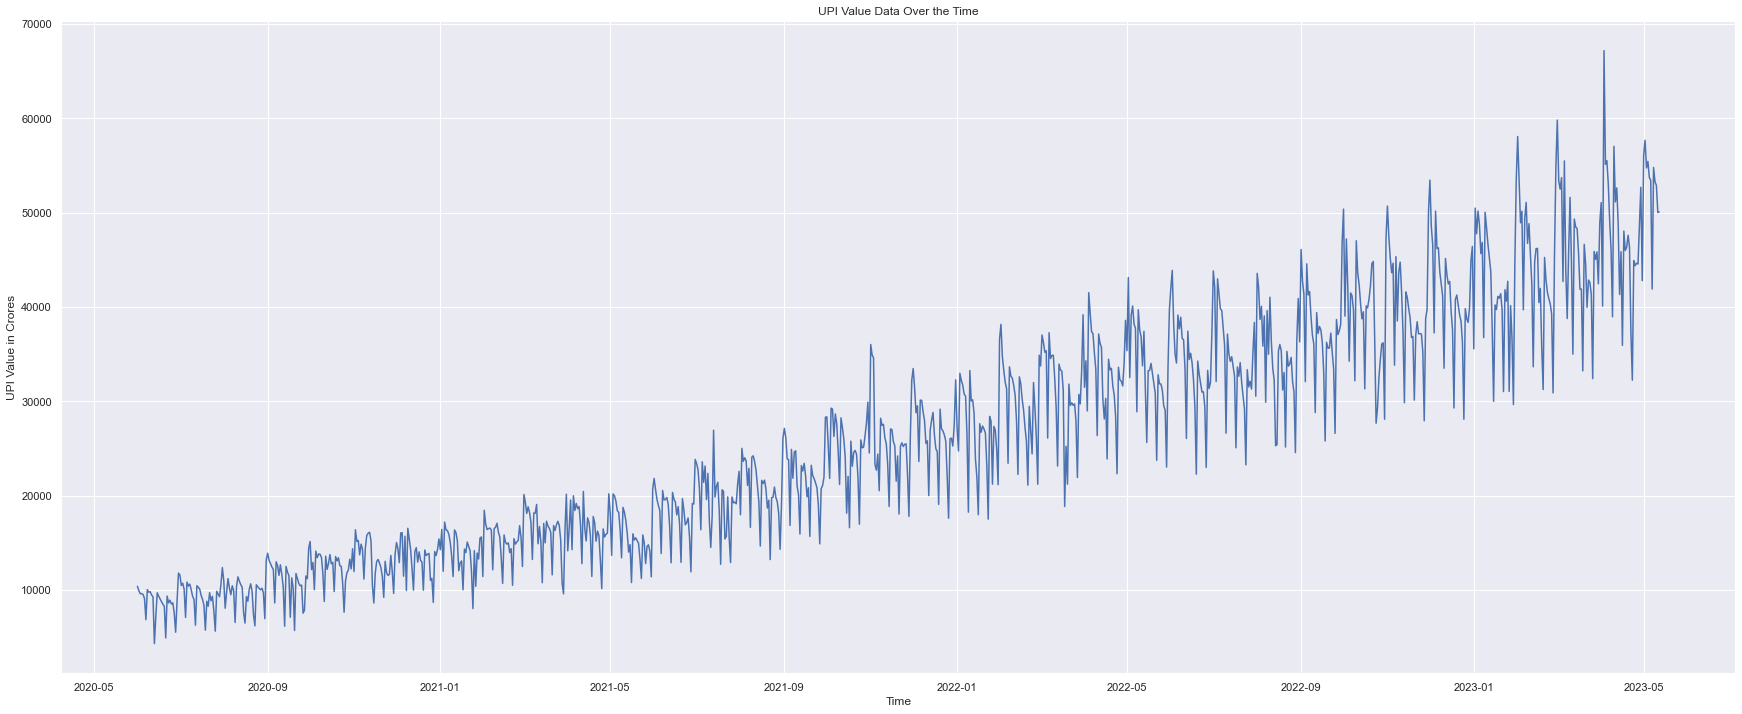

In [185]:
plt.figure(figsize=(30,12))
plt.plot(df_copy['DATE'],df_copy['Val'])
plt.title('UPI Value Data Over the Time')
plt.ylabel('UPI Value in Crores')
plt.xlabel('Time')
plt.show()

In [186]:
# Removing the trend

In [187]:
df_train_sarima = df_copy.head(860)
df_test_sarima = df_copy.loc[860:]

In [188]:
del df_train_sarima['Vol']
del df_test_sarima['Vol']

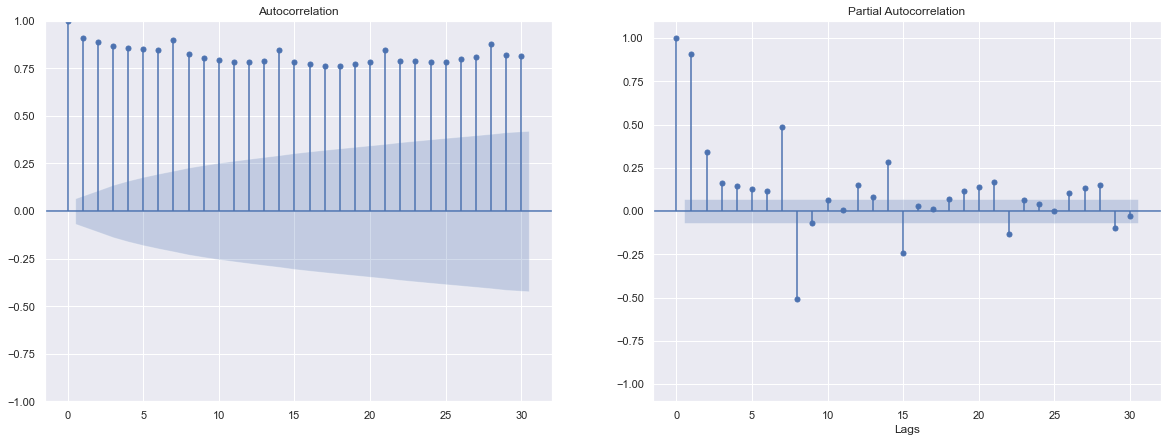

In [189]:
fig,ax = plt.subplots(nrows=1, ncols = 2, figsize=(20,7))
res1 = plot_acf(df_train_sarima['Val'],ax=ax[0])
plt.ylim(-1.1, 1.5)
plt.xlabel('Lags')
res2 = plot_pacf(df_train_sarima['Val'],ax=ax[1],method = 'ywm')
plt.ylim(-1.1, 1.1)
plt.xlabel('Lags')
plt.show()

In [190]:
first_diff= df_train_sarima['Val'].diff()

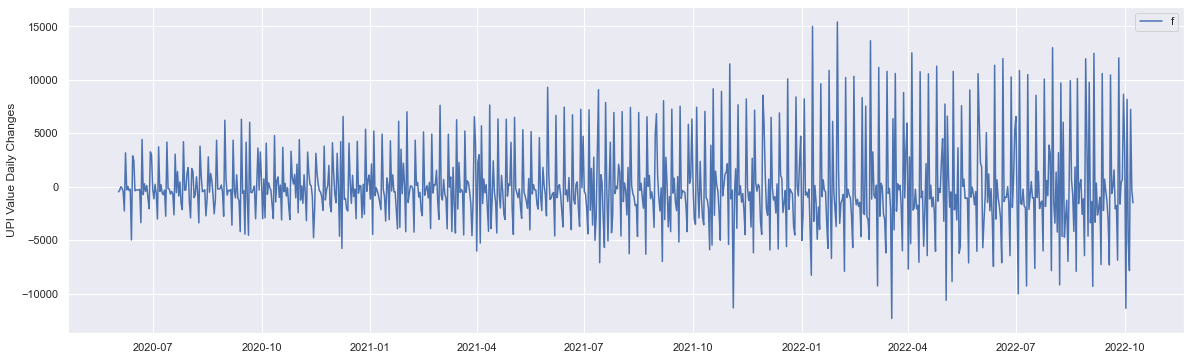

In [191]:
plt.figure(figsize=(20,6))
plt.plot(df_train_sarima['DATE'],first_diff)
plt.legend('first Differences')
plt.ylabel('UPI Value Daily Changes')
plt.show()

In [192]:
first_diff.dropna(inplace=True)## Dropping the NA values 

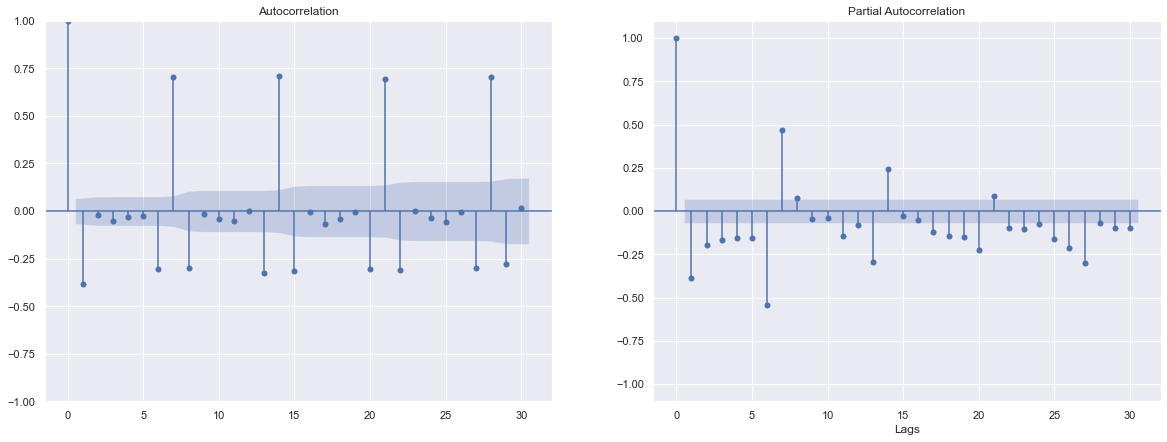

In [193]:
fig,ax = plt.subplots(nrows=1, ncols = 2, figsize=(20,7))
res1 = plot_acf(first_diff,ax=ax[0])
plt.ylim(-1.1, 1.5)
plt.xlabel('Lags')
res2 = plot_pacf(first_diff,ax=ax[1],method = 'ywm')
plt.ylim(-1.1, 1.1)
plt.xlabel('Lags')
plt.show()

In [369]:
my_order=(0,1,3)
my_seasonal_order=(0,1,5,7)

In [370]:
x_train_sarima = df_train_sarima.set_index('DATE')
x_test_sarima = df_test_sarima.set_index('DATE')
x_train_sarima.head()

,Val
DATE,
2020-06-01,10413.11
2020-06-02,9951.30
2020-06-03,9622.38
2020-06-04,9639.50
2020-06-05,9539.52


In [371]:
x_train_sarima = x_train_sarima.asfreq('d')

In [361]:
from pmdarima.arima import auto_arima


In [363]:
##model = auto_arima(x_train_sarima, start_p=0, start_q=1,
  #                 max_p=7, max_q=7, m=8,
   #                start_P=0, seasonal=True,
    #               d=None, D=None, trace=True,
     #              error_action='ignore',  
      #             suppress_warnings=True, 
                  # stepwise=True)

In [272]:
# Print the optimal parameters for SARIMA
print(model.order)
print(model.seasonal_order)

(3, 1, 2)
(2, 0, 0, 8)


In [372]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_sarima= SARIMAX(x_train_sarima, order=my_order, seasonal_order=my_seasonal_order).fit()

C:\Users\Shiv Yadav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [390]:
#summary of the model
print(model_sarima.summary())

                                            SARIMAX Results                                            
Dep. Variable:                                             Val   No. Observations:                  860
Model:             SARIMAX(0, 1, 3)x(0, 1, [1, 2, 3, 4, 5], 7)   Log Likelihood               -7735.101
Date:                                         Sat, 17 Jun 2023   AIC                          15488.202
Time:                                                 00:58:16   BIC                          15530.930
Sample:                                             06-01-2020   HQIC                         15504.567
                                                  - 10-08-2022                                         
Covariance Type:                                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1     

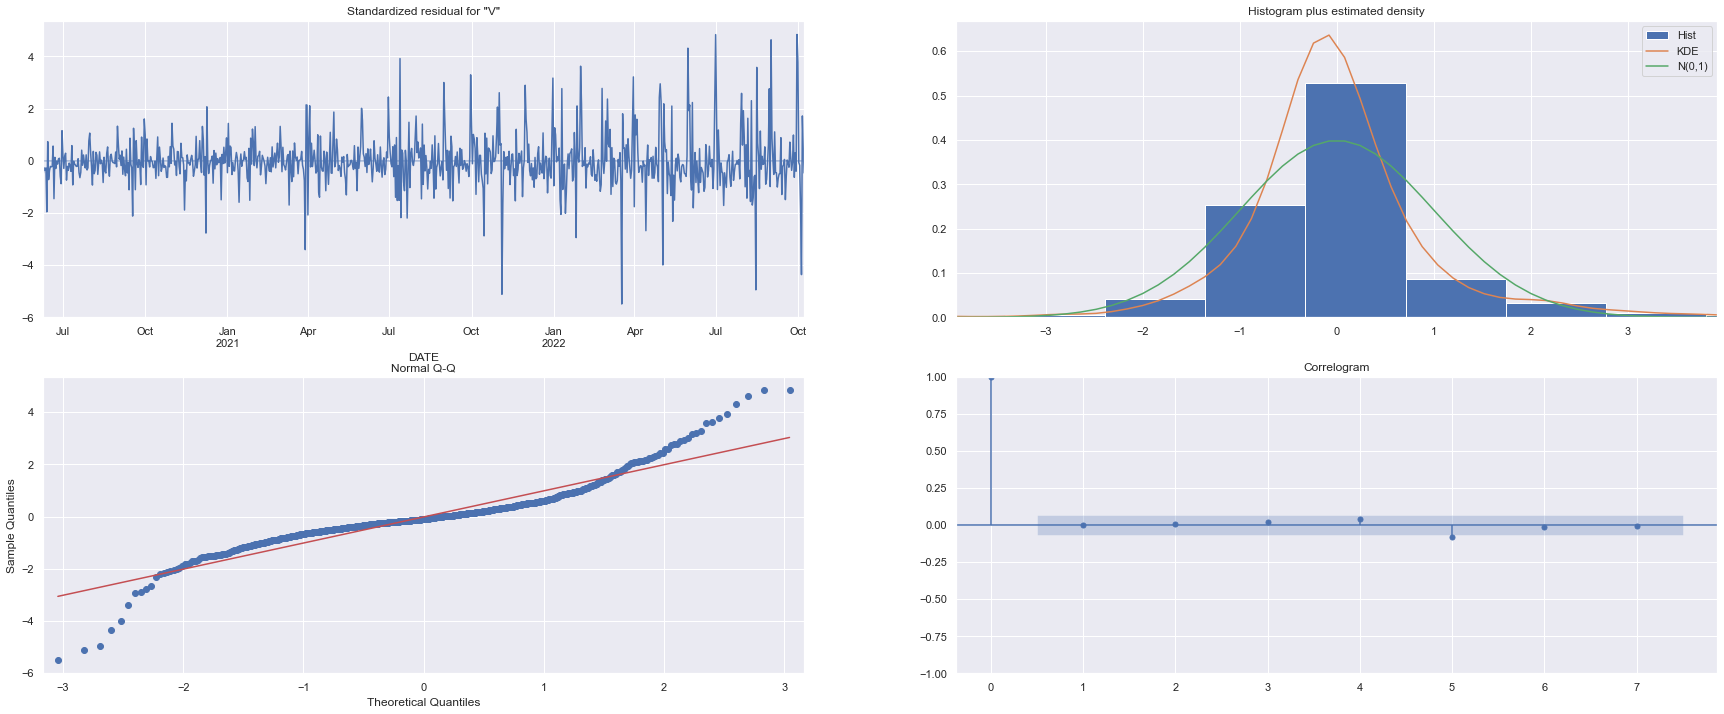

In [408]:
fig = plt.figure(figsize=(30,12))
fig = model_sarima.plot_diagnostics(lags = 7,fig =fig)

In [392]:
## Fitted values
fittedvalues = model_sarima.fittedvalues

In [393]:
fittedvalues.shape

(860,)

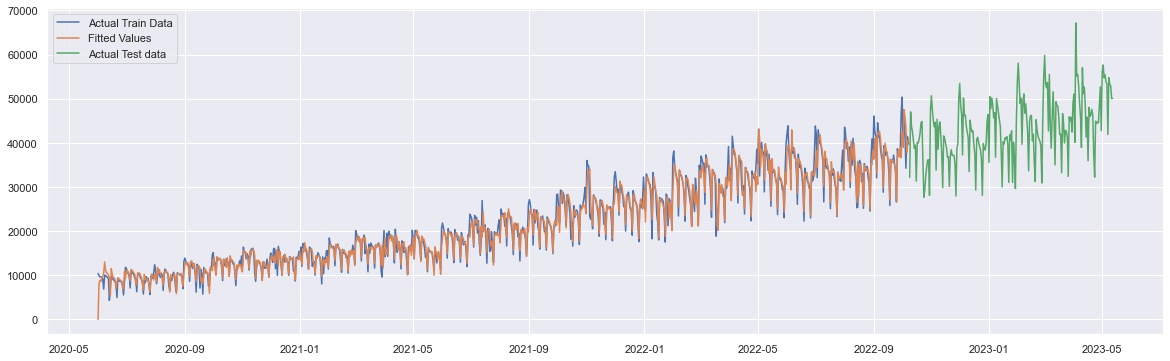

In [394]:
plt.figure(figsize=(20,6))
plt.plot(df_train_sarima['DATE'],df_train_sarima['Val'])
## fitted values
plt.plot(fittedvalues)
plt.plot(df_test_sarima['DATE'],df_test_sarima['Val'])
##
plt.legend(['Actual Train Data','Fitted Values','Actual Test data'])
plt.show()

In [395]:
forecasted_sarima = model_sarima.predict(start = start_d,end = end_d )

In [396]:
forecasted_sarima.head()

2022-10-09    32356.679020
2022-10-10    42637.966998
2022-10-11    41377.456756
2022-10-12    41230.329968
2022-10-13    41748.328228
Freq: D, Name: predicted_mean, dtype: float64

In [397]:
forecasted_S = pd.DataFrame(forecasted_sarima)
forecasted_S.head()

,predicted_mean
2022-10-09,32356.679020
2022-10-10,42637.966998
2022-10-11,41377.456756
2022-10-12,41230.329968
2022-10-13,41748.328228


In [398]:
wn_mean =  model_sarima.resid.mean()

In [399]:
wn_std = model_sarima.resid.std()

In [400]:
## Generating the normal random errors for forecasting
np.random.seed(42)
size1 = len(forecasted_S)
random_errors1 = np.random.normal(wn_mean, wn_std, size1)

In [401]:
forecasted_S['rand_err_n'] = random_errors1

In [402]:
forecasted_S['trend_n'] = forecasted_sarima

In [403]:
forecasted_S.head()

,predicted_mean,rand_err_n,trend_n
2022-10-09,32356.679020,1046.510388,32356.679020
2022-10-10,42637.966998,-314.960978,42637.966998
2022-10-11,41377.456756,1370.217910,41377.456756
2022-10-12,41230.329968,3247.056616,41230.329968
2022-10-13,41748.328228,-520.558864,41748.328228


In [404]:
forecasted_S['final_forecasted_values'] = forecasted_S['trend_n']+forecasted_S['rand_err_n']

In [405]:
forecasted_S.head()

,predicted_mean,rand_err_n,trend_n,final_forecasted_values
2022-10-09,32356.679020,1046.510388,32356.679020,33403.189408
2022-10-10,42637.966998,-314.960978,42637.966998,42323.006020
2022-10-11,41377.456756,1370.217910,41377.456756,42747.674666
2022-10-12,41230.329968,3247.056616,41230.329968,44477.386584
2022-10-13,41748.328228,-520.558864,41748.328228,41227.769364


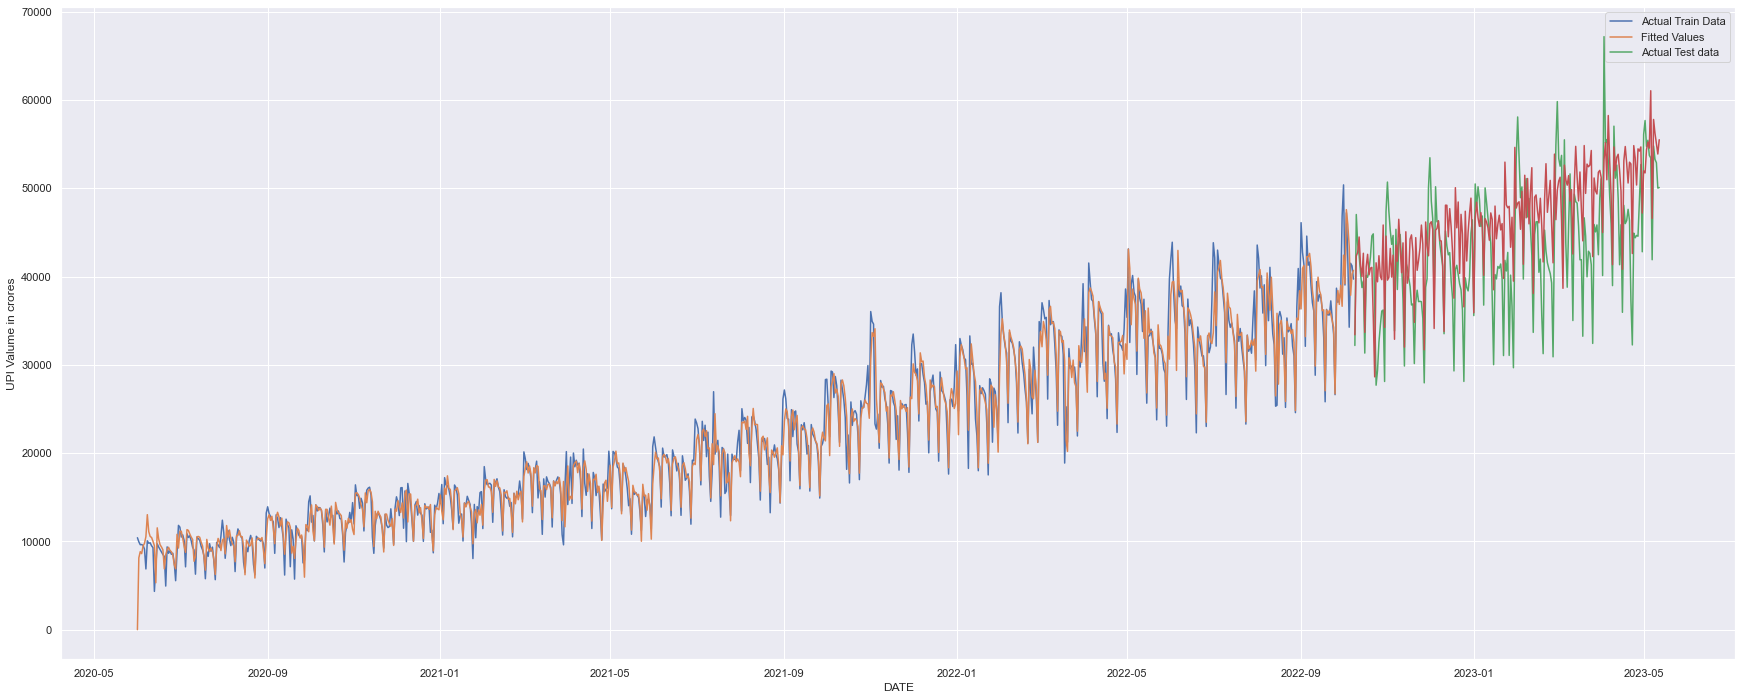

In [407]:
plt.figure(figsize=(30,12))
plt.plot(df_train_sarima['DATE'],df_train_sarima['Val'])
## fitted values
plt.plot(fittedvalues)
#
plt.plot(df_test_sarima['DATE'],df_test_sarima['Val'])
##Forecasted Values
plt.plot(df_test_sarima['DATE'],forecasted_S['final_forecasted_values'])


plt.xlabel('DATE')
plt.ylabel('UPI Valume in crores')
plt.legend(['Actual Train Data','Fitted Values','Actual Test data'])
